/tmp/ipykernel_1704/1864625288.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  member_casual = data.groupby(['member_casual', 'day_of_week']).size().unstack().T


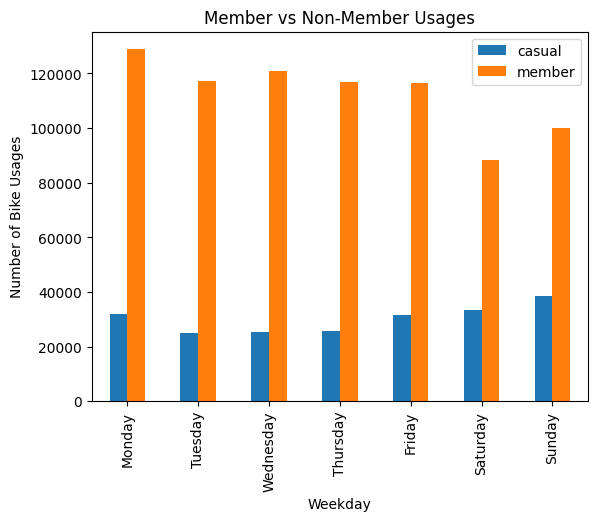

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import folium

# Analyze member vs non member usage for New York City Bikes
data = pd.read_csv('data/202409-citibike-tripdata_1.csv', low_memory = False)
data['started_at'] = pd.to_datetime(data['started_at'])
data['day_of_week'] = data['started_at'].dt.day_name()

# Group data using members and day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['day_of_week'] = pd.Categorical(data['day_of_week'], categories = day_order, ordered = True)
member_casual = data.groupby(['member_casual', 'day_of_week']).size().unstack().T

# Plot bar graph for member and casual usages for mon to sun
member_casual.plot(kind = 'bar')
plt.title('Member vs Non-Member Usages')
plt.xlabel('Weekday')
plt.ylabel('Number of Bike Usages')
plt.legend()
plt.show()

# Analyze weather and create linear regression model
weather_data = pd.read_csv('data/202409-noaa-nyc-weatherdata.csv')

# Match different data format to merge with bike data
weather_data['date'] = pd.to_datetime(weather_data['Date'])
data['date'] = data['started_at'].dt.date
data['date'] = pd.to_datetime(data['date'])
daily_bike_usage = data.groupby('date').size().reset_index(name = 'bike_usage')

# Merge data 
merged_data = pd.merge(daily_bike_usage, weather_data, left_on='date', right_on='date')
x = merged_data[['Average']]
y = merged_data['bike_usage']
